In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)



In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

recent_date = session.query(func.max(Measurement.date)).scalar()

print(f" {recent_date} Is the most recent date.")


 2017-08-23 Is the most recent date.


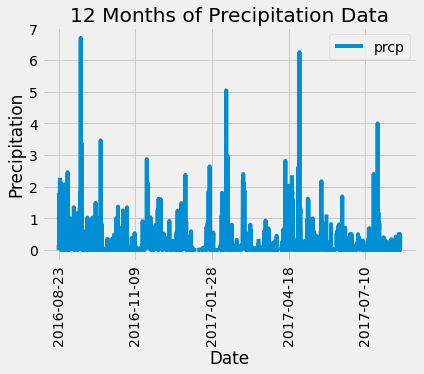

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recent_date = session.query(func.max(Measurement.date)).scalar()


# Calculate the date one year from the last date in data set.


recent_date = pd.to_datetime(recent_date) 
YearOne = recent_date - pd.DateOffset(years=1)


# Perform a query to retrieve the data and precipitation scores

result = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= YearOne.strftime('%Y-%m-%d'))\
    .order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

precipitationDB = pd.DataFrame(result, columns = ['date', 'prcp'])
precipitationDB.set_index('date', inplace = True)




# Sort the dataframe by date

precipitationDB.sort_index(inplace = True)


# Use Pandas Plotting with Matplotlib to plot the data

ax = precipitationDB.plot(rot=90)
ax.set_title("12 Months of Precipitation Data")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
plt.show()




In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitationDB.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(func.count(Station.id)).scalar()


print(f'{total_stations} is the total number of stations in the dataset')

9 is the total number of stations in the dataset


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

results = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

for result in results:
    print(f"{result[0]}: {result[1]}")


USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

ActiveStation = session.query(Measurement.station)\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .first()[0]


results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station == ActiveStation).all()

print(f"Lowest Temp is: {results[0][0]}")
print(f"Highest Temp is: {results[0][1]}")
print(f"Average Temp is: {results[0][2]}")


Lowest Temp is: 54.0
Highest Temp is: 85.0
Average Temp is: 71.66378066378067


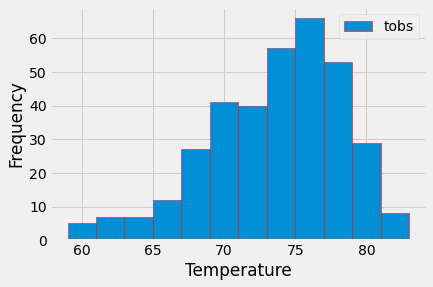

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs)\
    .filter(Measurement.station == ActiveStation)\
    .filter(Measurement.date >= YearOne.strftime('%Y-%m-%d'))\
    .all()

temperatures = [result[0] for result in results]


plt.hist(temperatures, bins=12, label='tobs', edgecolor='red')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close session

In [16]:
# Close Session
session.close()